In [1]:
import os
import json
import itertools
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

from scipy.optimize import curve_fit

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite','4_TEST')

In [22]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [17]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_1dy_2002_2012_npix_1_thr_1_acf_mar_ZOR_pearson.nc'))
lat = data.lat.values
lon = data.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)
Tr = data.Tr.values

BETA3 = data.BETA.values
GAMMA3 = data.GAMMA.values

Mev_d3 = data.Mev_d.values

In [15]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_1dy_2002_2012_npix_2_thr_1_acf_mar_ZOR_pearson.nc'))

BETA5 = data.BETA.values
GAMMA5 = data.GAMMA.values

Mev_d5 = data.Mev_d.values

In [16]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_1dy_2002_2012_npix_3_thr_1_acf_mar.nc'))
data
# BETA7 = data.BETA.values
# GAMMA7 = data.GAMMA.values

Mev_d7 = data.Mev_d.values

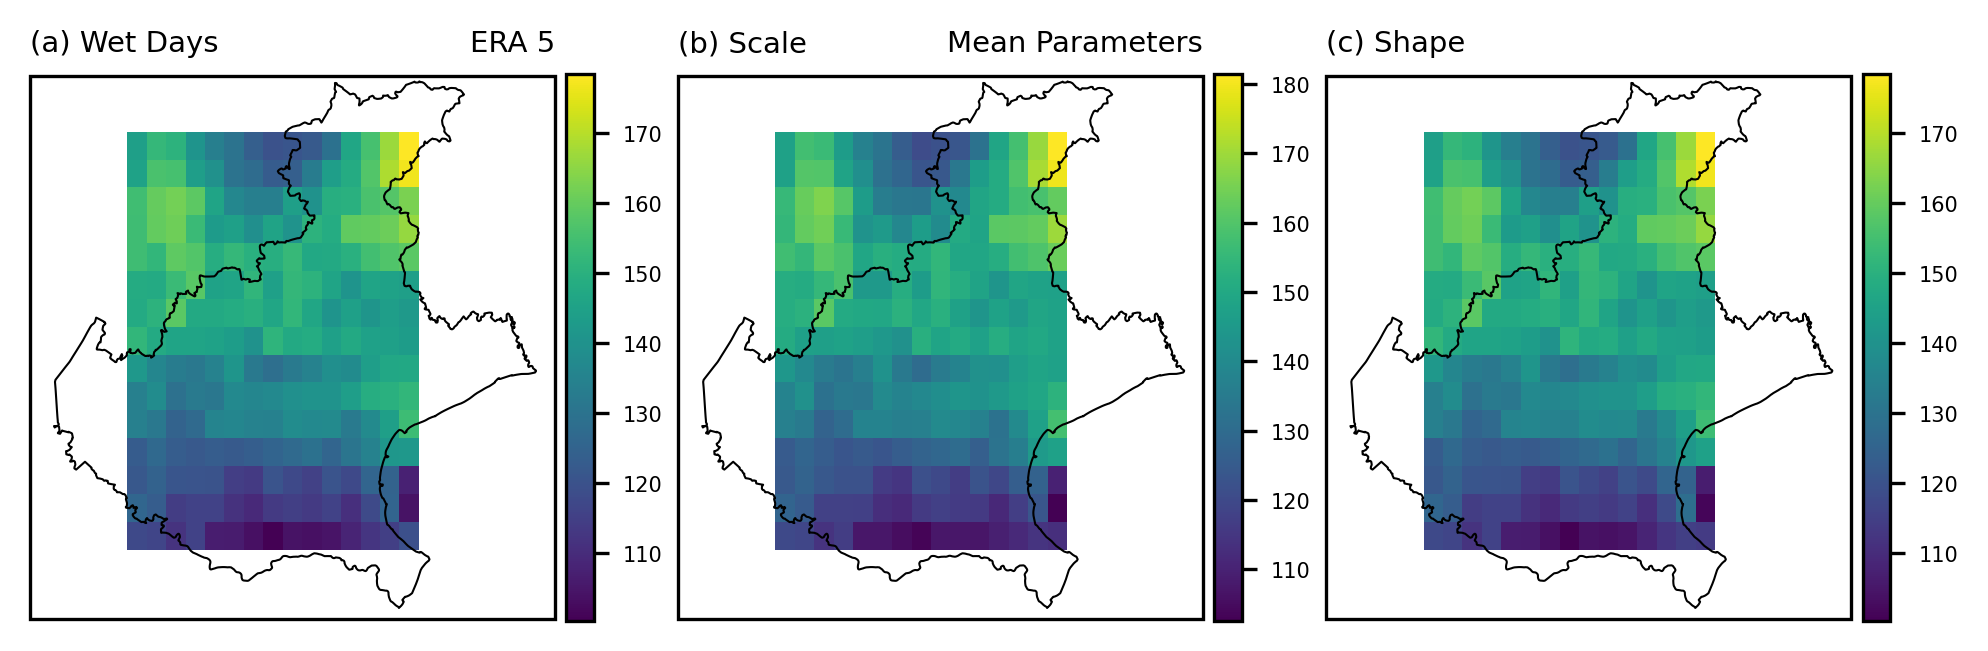

In [27]:
N_norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d3[3,:,:], norm=N_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Wet Days', fontsize=7, loc='left')
ax1.set_title(f'ERA 5', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d5[3,:,:], norm=N_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Scale', fontsize=7, loc='left')
ax1.set_title(f'Mean Parameters', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d7[3,:,:], norm=N_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Shape', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)